In [1]:
# Commented code to extract date from yahoo finance

# %matplotlib inline

# import numpy as np  
# import matplotlib.pyplot as plt
# import pandas.io.data as web
# import datetime

# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2016, 6, 6)

# price = web.DataReader('USO', 'yahoo', start, end)

# price.head()

# price.plot()

# price.to_csv('stockprice.csv')

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from datetime import datetime

import csv

In [3]:
# Read in data
date = []
adj_close = []

# Get the string date
with open('stockprice.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dt = datetime.strptime(row['Date'], '%Y-%m-%d')
        date.append(dt)
        
# Get the close value 
data = np.genfromtxt ('stockprice.csv', delimiter=",")
adj_close = data[1:data.shape[0], 1]

In [4]:
type(date[0])

datetime.datetime

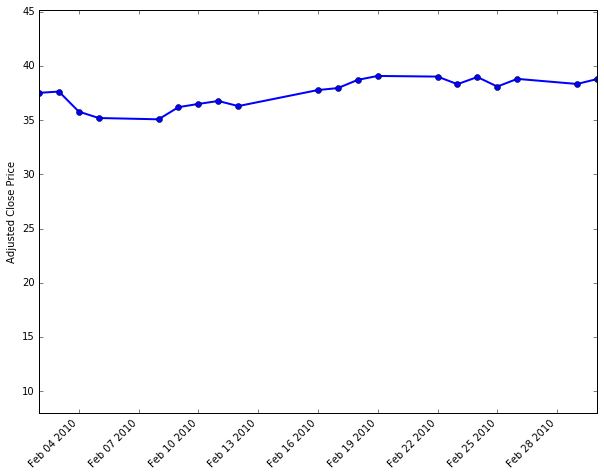

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(10,8))

fig.autofmt_xdate(rotation=45)

line, = ax.plot_date(date[20:40],adj_close[20:40], '-o', lw=2)
ax.set_ylim((min(adj_close), max(adj_close)))
ax.set_ylabel('Adjusted Close Price')

In [6]:
# initialization function: plot the background of each frame
def init():
    line.set_data(date[0:20], adj_close[0:20])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    line.set_data(date[i:i+20], adj_close[i:i+20])
    # Update X-axis
    ax.set_xlim(date[i], date[i+20])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1500, interval=50, blit=False)

HTML(anim.to_html5_video())